# 01 - Exploratory Data Analysis (EDA)

## 1. Load Libraries + Data  

In [1]:
import pandas as pd
import json
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# Configure Plots 
sns.set(style = "whitegrid")
%matplotlib inline



In [2]:
# Load main data
df = pd.read_csv('../data/raw/Usvideos.csv')
df.head()



,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
# Loading category id json
with open('../data/raw/US_category_id.json', 'r') as cat_id:
    cat_data = json. load(cat_id)

cat_items = cat_data['items']
categories_df = pd.DataFrame([{'category_id': int(item['id']), "category_title": item['snippet']['title']} for item in cat_items])

In [4]:
# Combining datasets on cat_id key
df = df.merge(categories_df, on = 'category_id', how = "left")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


## 2. Data Overview

In [5]:

df.shape  # Rows x cplumns  

(40949, 17)

In [6]:
df.info() # Features and Non-Null count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [7]:
df.isna().sum() # Count of missing values

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
category_title              0
dtype: int64

In [8]:
df.describe() # Statistical summaries of quantitative variables 

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [9]:
# Summary statistic of view by video category
df.groupby('category_title')['views'].describe()

,count,mean,std,min,25%,50%,75%,max
category_title,,,,,,,,
Autos & Vehicles,384.0,1.355965e+06,3.373464e+06,2860.0,104652.75,406278.0,1074284.25,25244097.0
Comedy,3457.0,1.480308e+06,2.009899e+06,1807.0,351261.00,980236.0,1877801.00,29178096.0
Education,1656.0,7.129408e+05,8.792676e+05,773.0,249115.25,419440.5,772115.00,7349435.0
Entertainment,9964.0,2.067883e+06,5.815996e+06,798.0,273394.75,734704.0,1733746.25,149376127.0
Film & Animation,2345.0,3.106250e+06,5.576255e+06,943.0,302850.00,1274578.0,3227166.00,54863912.0
Gaming,817.0,2.620831e+06,3.165318e+06,1237.0,530676.00,1494142.0,3202761.00,16935442.0
Howto & Style,4146.0,9.837301e+05,1.928995e+06,1107.0,215422.25,502783.0,1098035.75,54155921.0
Music,6472.0,6.201003e+06,1.545988e+07,1591.0,382714.75,1434128.0,4947952.75,225211923.0
News & Politics,2487.0,5.925877e+05,1.118918e+06,549.0,50855.00,244014.0,685282.00,10277358.0


## 3. Data Visualisation 

### Univariate Plots

In [10]:
#Dataframe to store log transformed variables
df_log = pd.DataFrame()

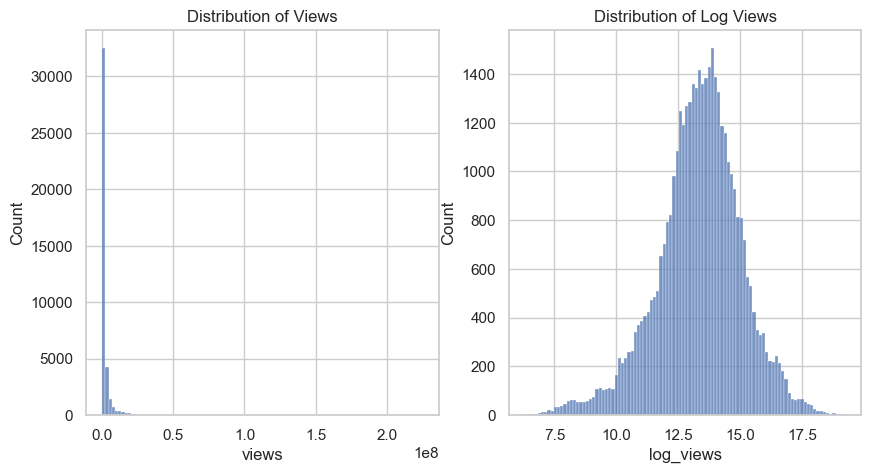

In [11]:
# Distribution of Log views
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
df_log['log_views'] = np.log1p(df['views'])

sns.histplot(df['views'], bins= 100, ax = axes[0] )
axes[0].set_title('Distribution of Views')
sns.histplot(df_log['log_views'], bins= 100, ax = axes[1] )
axes[1].set_title('Distribution of Log Views')
plt.show()

#### Observation 
The distribution of view is highly skewed to the right. The vast majority of the videos receive a similar amount of views and as view count increased there are sharp drops in the count. 

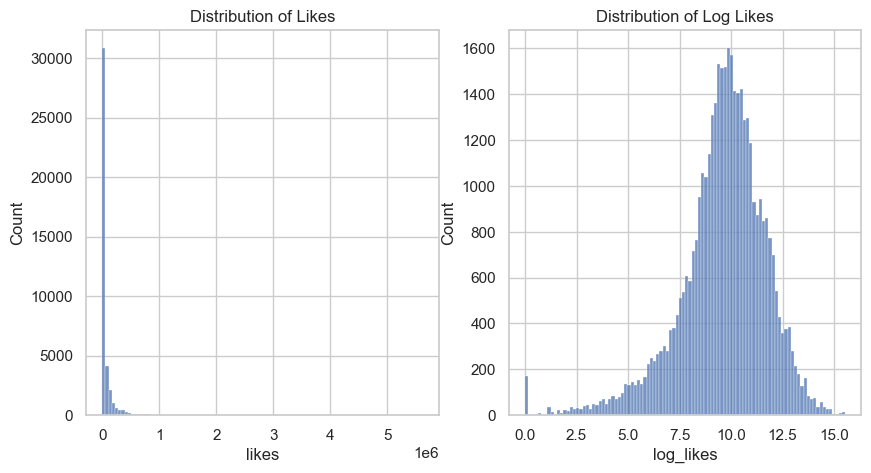

In [12]:
#Distribution of Likes 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.histplot(df['likes'], bins= 100, ax= axes[0])
axes[0].set_title("Distribution of Likes")

df_log['log_likes'] = np.log1p(df['likes'])
sns.histplot(df_log['log_likes'], bins= 100, ax= axes[1])
plt.title("Distribution of Log Likes")
plt.show()

#### Observation 
The distribution of likes, similar to the distribution of view is highly skewed to the right. The vast majority of videos receive relatively few likes, with a few top preformers vastly outpreforming the average. 

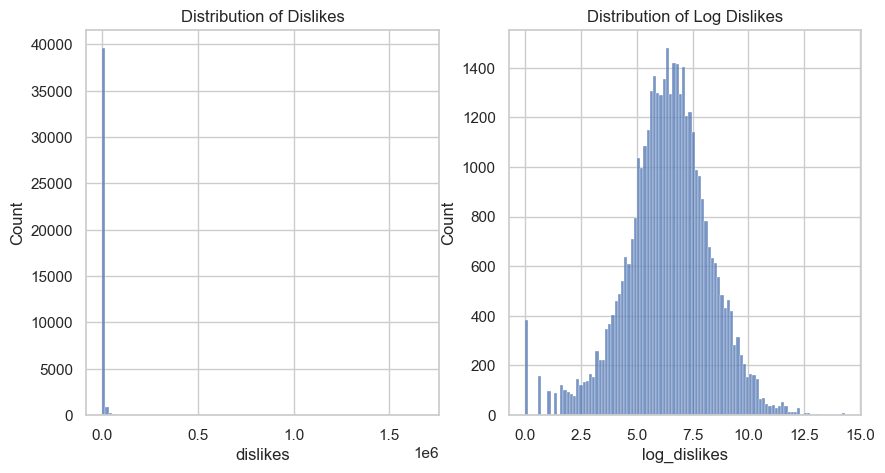

In [13]:
#Distribution of dislikes 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.histplot(df['dislikes'], bins= 100, ax= axes[0])
axes[0].set_title("Distribution of Dislikes")

df_log['log_dislikes'] = np.log1p(df['dislikes'])
sns.histplot(df_log['log_dislikes'], bins= 100, ax= axes[1])
plt.title("Distribution of Log Dislikes")
plt.show()

#### Observation 
Interestingly, it seems as though the distribution of dislikes is subject to an even more extreme right skew as well as having a smaller range. This seems to imply that a dislike as significantly less common than a likes 

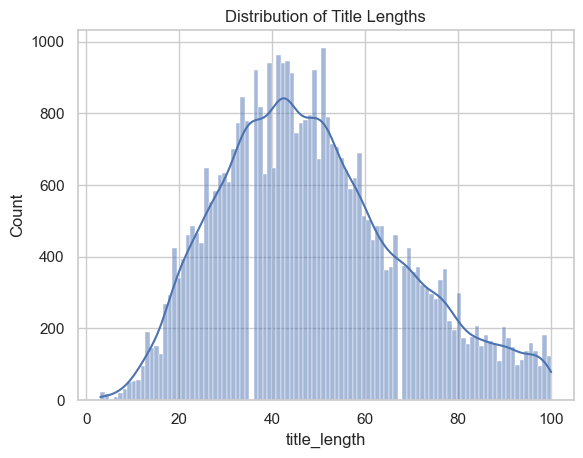

In [14]:
#Distribution of title lengths 
df['title_length'] = df['title'].str.len()
sns.histplot(df['title_length'], bins = 100, kde = True)
plt.title("Distribution of Title Lengths")
plt.show()


#### Observation 
The distribution of title lengths seems to follow as a relatively normal distribution with a slight right skew implying title lengths tend to be on the shorter side on average.

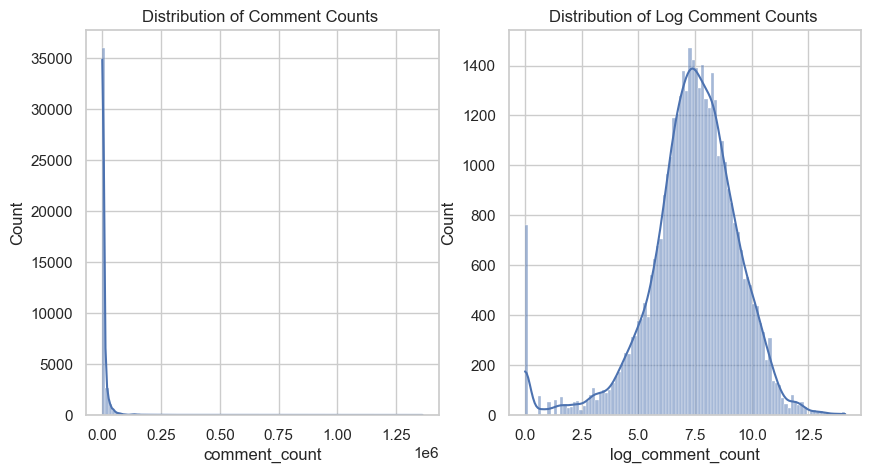

In [15]:
#  Distribution of Comment Counts 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

sns.histplot(df['comment_count'], bins = 100, kde = True, ax = axes[0])
axes[0].set_title('Distribution of Comment Counts ')

df_log['log_comment_count'] = np.log1p(df['comment_count'])
sns.histplot(df_log['log_comment_count'], bins = 100, kde = True, ax = axes[1])
axes[1].set_title('Distribution of Log Comment Counts ')

plt.show()

#### Observations
The distribution of comment counts is highly right skewed implying once again that the vast majority of trending videos recieve relatively few comments compared to the outliers.  

### Datatime Feature Plots

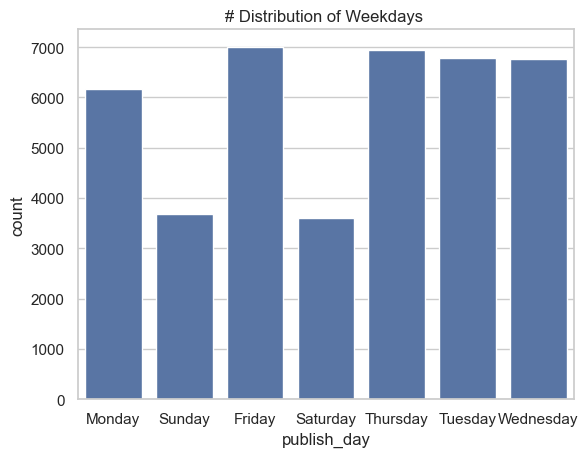

In [16]:
# Distribution of the day of the week
df['publish_time'] = pd.to_datetime(df['publish_time'])
df["publish_day"] = df['publish_time'].dt.day_name()

sns.countplot(x= 'publish_day',  data = df)
plt.title("# Distribution of Weekdays ")

plt.show()

#### Observation 
The most popular day to post seems to be Friday by a small margin. While Sunday and Saturday are seem to be the least popular.

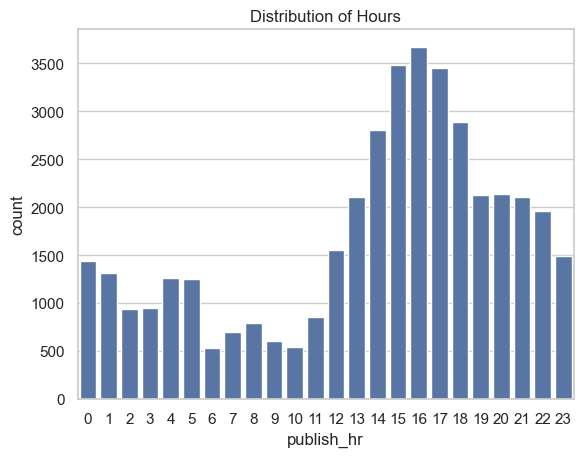

In [17]:
# Distribution of hours of the day. 
df["publish_hr"] = df['publish_time'].dt.hour

sns.countplot(x = "publish_hr", data = df )
plt.title("Distribution of Hours")

plt.show()

#### Observation 
The most popular times to post videos seem to be between 3:00 PM and 5PM 


### Relationship Between Features and Target

#### Title Length vs. Views

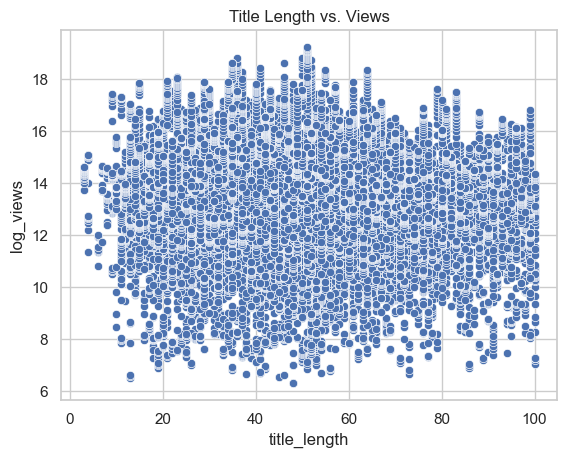

In [18]:
sns.scatterplot (x = df['title_length'], y = df_log['log_views'] )
plt.title('Title Length vs. Views')
plt.show()

#### Observation
There seems to be no correlation between log views and title length 

#### Description Length vs. Views 

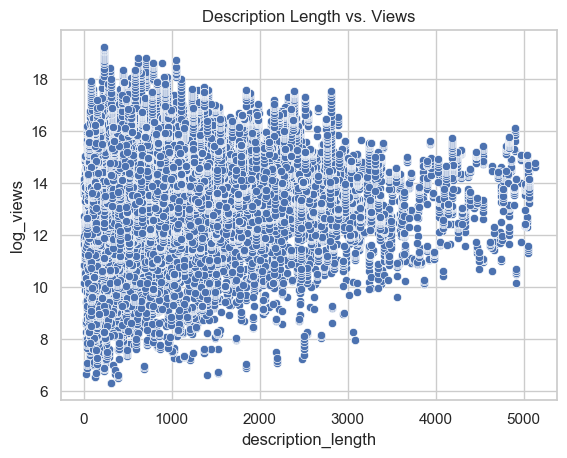

In [19]:
df['description_length'] = df['description'].str.len()
sns.scatterplot( x = df['description_length'], y = df_log['log_views'])
plt.title('Description Length vs. Views')
plt.show()

#### Observation 
There seem to be a possible weak correlation between log views and description length however there is no clear linear trend.

####

### Correlation Plots

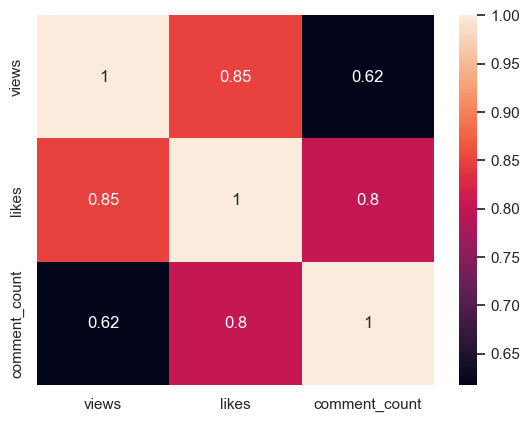

In [20]:
# Correlation between comments, likes and views
corr = df[['views', 'likes', 'comment_count' ]].corr()
sns.heatmap(corr, annot=True)
plt.show()

#### Observation
There is relatively strong correlation between the chosen variables. The strongest correlation being between likes and views which is to be expected give how the Youtube algorithm rewards videos with many likes. 

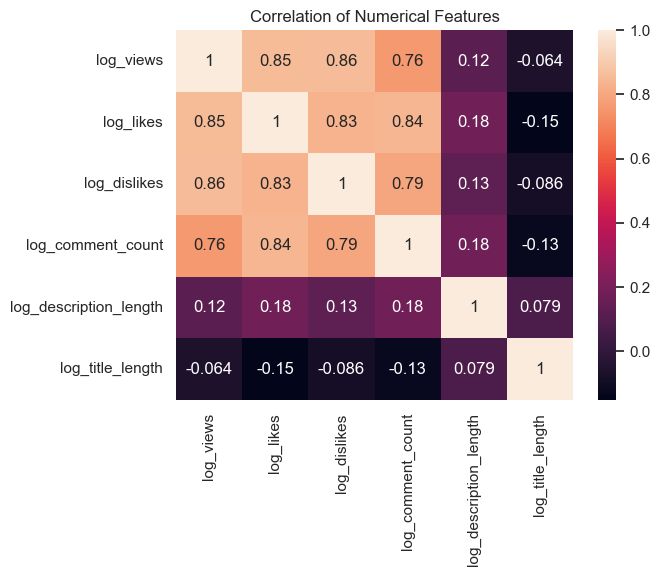

In [21]:
#Correlation heatmap between Log transformed numerical features 
df.head()
df_log['log_description_length'] = np.log1p(df['description_length'])
df_log['log_title_length'] = np.log1p(df['title_length'])

df_heat = df_log[["log_views",'log_likes','log_dislikes', 'log_comment_count', 'log_description_length','log_title_length' ]].corr()
sns.heatmap(data = df_heat, annot = True)
plt.title("Correlation of Numerical Features")
plt.show()

#### Observations 
There seems to be once again significant correlation between variable assessed in the previous vheatmap, however log_description_length and log_title_length seem to have very little correlation with any of the variables.

## 4. Conculsion

This EDA reveals strong right-skew in video views, dislikes, likes and comment count. Log-transformations help normalize the distributions. Category titles were merged using a JSON map, and the most-viewed categories include Music and Entertainment. There seems to be no significant correlation between views and description length or title length. These insights will guide feature engineering and model choices in the next step.  